In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t
from statsmodels.tsa.arima.model import ARIMA

In [279]:
np.random.seed(42)

# Question 1

In [280]:
sigma = 0.5
price_prev = 100

r = np.random.normal(0, sigma, 10000)

price_classic = np.array(price_prev + r)
price_arithmetic = price_prev * (1 + r)
price_gbm = price_prev * np.exp(r)

print(np.mean(price_classic), np.std(price_classic))
print(np.mean(price_arithmetic), np.std(price_arithmetic))
print(np.mean(np.log(price_gbm)), np.std(np.log(price_gbm)))

99.99893200831579 0.5017061030649939
99.89320083157868 50.170610306499384
4.604102194303878 0.5017061030649937


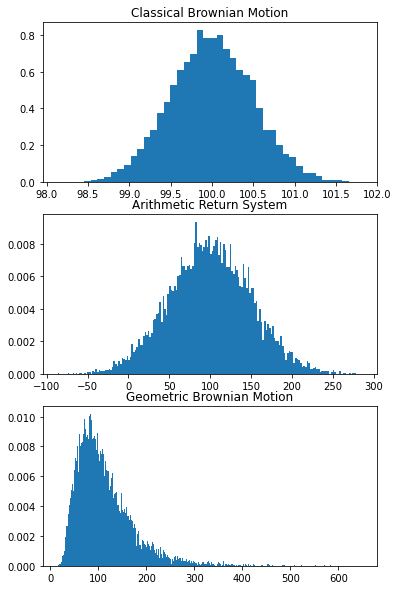

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))
axes[0].set_title("Classical Brownian Motion")
axes[1].set_title("Arithmetic Return System")
axes[2].set_title("Geometric Brownian Motion")
axes[0].hist(price_classic, bins=np.arange(min(price_classic), max(price_classic), 0.08), density=True)
axes[1].hist(price_arithmetic, bins=np.arange(min(price_arithmetic), max(price_arithmetic), 2), density=True)
axes[2].hist(price_gbm, bins=np.arange(min(price_gbm), max(price_gbm), 2), density=True)
plt.show()

# Question 2

In [281]:
def return_calculate(price, method = 'discrete'):
    returns = []
    for i in range(len(price)-1):
        returns.append(price[i+1]/price[i])
    returns = np.array(returns)
    if method == 'discrete':
        return returns - 1
    if method == 'log':
        return np.log(returns)

In [385]:
prices_daily = pd.read_csv('DailyPrices.csv')

In [386]:
prices_dropdate = prices_daily.drop(['Date'], axis=1)
returns = pd.DataFrame()
for col in prices_dropdate:
    ret = return_calculate(prices_dropdate[col])
    returns[col] = ret
returns

<ipython-input-386-26777d7b1ab3>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[col] = ret


,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,GOOG,BRK-B,META,...,CI,ETN,SLB,PGR,SCHW,LRCX,ZTS,C,BSX,AMT
0,-0.010544,-0.013611,-0.016667,-0.002425,-0.020808,-0.017223,-0.025076,-0.016915,-0.016854,-0.030479,...,-0.001180,-0.010593,0.033107,-0.010428,-0.019242,-0.004236,-0.015244,0.001846,-0.012198,-0.026355
1,-0.003773,-0.008215,-0.010974,-0.010980,-0.013336,-0.009643,0.015581,-0.011042,-0.003890,-0.011103,...,-0.004641,0.008449,-0.014118,0.000572,0.001848,-0.008019,-0.000892,-0.012695,-0.002717,0.013275
2,0.017965,0.009254,0.019111,0.026723,0.018795,0.024717,0.033817,0.027912,0.016089,0.011669,...,0.016652,0.020295,-0.008030,0.038537,0.018731,0.012279,0.022698,0.008503,0.026994,0.020930
3,0.006536,-0.009618,0.001666,0.002626,0.020126,-0.009776,0.019598,-0.009595,0.008184,0.010412,...,0.002448,0.013945,0.029951,0.015880,0.019083,0.016574,-0.011908,0.026116,0.029901,0.008362
4,0.015535,0.018840,0.022977,0.026575,0.028377,0.020945,0.036023,0.021568,0.008576,0.043749,...,0.007327,0.017244,0.038774,-0.004179,0.018863,0.026460,0.036721,0.015431,0.005385,-0.000306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.000586,0.016913,-0.003513,-0.002920,0.001503,0.005895,-0.033201,0.004772,0.006986,0.007459,...,0.007485,0.006938,0.010399,0.013118,-0.006183,0.020125,-0.003329,-0.001639,0.001890,-0.003386
261,-0.002074,0.006181,-0.001246,-0.016788,-0.010144,-0.001230,0.004599,-0.000936,0.000135,0.008329,...,-0.002453,-0.013644,-0.012743,0.013589,-0.002247,-0.016519,0.012970,0.000938,0.000566,-0.012087
262,-0.009193,-0.019992,-0.023977,-0.017002,-0.029435,-0.031150,-0.014672,-0.030541,-0.009879,-0.017701,...,0.009450,-0.006986,-0.010591,0.001544,-0.018361,-0.010062,-0.002748,-0.008903,0.020177,0.000282
263,-0.016528,-0.008889,-0.003866,-0.044053,-0.028931,-0.024675,-0.026239,-0.023999,-0.009651,-0.013148,...,0.012216,-0.018635,-0.016223,-0.002032,-0.011646,-0.013686,-0.026725,-0.013948,-0.002403,-0.045601


In [284]:
meta = returns['META'] - np.mean(returns['META'])
meta

0     -0.033266
1     -0.013890
2      0.008882
3      0.007625
4      0.040962
         ...   
260    0.004672
261    0.005542
262   -0.020488
263   -0.015935
264    0.008541
Name: META, Length: 265, dtype: float64

In [285]:
returns['META'].mean()

0.0027871363461748136

In [286]:
def calculate_var(data, alpha=0.05):
    return -np.quantile(data, alpha)

In [287]:
# Using the normal distribution
def calculate_var_normal(returns, n=10000, alpha=0.05):
    mu = returns.mean()
    sigma = returns.std()
    sim_returns = np.random.normal(mu, sigma, n)
    var_normal = calculate_var(sim_returns, alpha)
    return var_normal, sim_returns

In [288]:
calculate_var_normal(meta)

(0.053114302582064433,
 array([-0.02239312, -0.01008274, -0.01971603, ...,  0.01248724,
         0.05655353, -0.05346401]))

In [289]:
# Using normal distr with exp weighted var (lambda = 0.94)

# Generate the exponential weights and covariance matrix from last week
def expWeights(n, lambd):
    weights = np.zeros(n)
    for i in range(1, n+1):
        weights[i-1] = (1-lambd) * (lambd**(i-1))
    normWeights = weights / np.sum(weights)
    return normWeights[::-1]

def expCovMat(data, weights):
    normData = data - data.mean()
    return np.dot(data.T, np.diag(weights) @ data)

def calculate_var_ew_normal(returns, lambd=0.94, n=10000, alpha=0.05):
    mu = returns.mean()
    weights = expWeights(len(returns), lambd)
    exp_cov = expCovMat(np.matrix(returns).T, weights)
    sigma = np.sqrt(exp_cov[0, 0])
    sim_returns = np.random.normal(mu, sigma, n)
    var_ew = calculate_var(sim_returns, alpha)
    return var_ew, sim_returns

In [290]:
calculate_var_ew_normal(meta)

(0.029473650417218195,
 array([ 0.00634845,  0.00516433, -0.01707058, ..., -0.00913876,
        -0.03449326, -0.00417203]))

In [291]:
# Using MLE fitted T distribution
def calculate_var_t_MLE(returns, n=10000, alpha=0.05):
    ret = t.fit(returns)
    df, mu, sigma = ret[0], ret[1], ret[2]
    sim_returns = t(df, mu, sigma).rvs(n)
    var_t = calculate_var(sim_returns, alpha)
    return var_t, sim_returns

In [292]:
calculate_var_t_MLE(meta)

(0.04317863044237405,
 array([-0.07424834,  0.00264643, -0.02956836, ..., -0.00549164,
         0.02786801,  0.00715518]))

In [293]:
model = ARIMA(meta, order=(1,0,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   META   No. Observations:                  265
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 528.712
Date:                Fri, 29 Sep 2023   AIC                          -1051.423
Time:                        20:19:25   BIC                          -1040.684
Sample:                             0   HQIC                         -1047.108
                                - 265                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.14e-06      0.002     -0.001      1.000      -0.004       0.004
ar.L1          0.0461      0.081      0.569      0.569      -0.113       0.205
sigma2         0.0011   4.17e-05     25.987      0.0

In [294]:
# Using fitted AR(1) model
def calculate_var_ar1(returns, n=10000, alpha=0.05):
    mu = returns.mean()
    model = ARIMA(meta, order=(1, 0, 0))
    res = model.fit()
    sigma = np.sqrt(res.params['sigma2'])
    sim_returns = np.random.normal(mu, sigma, n)
    var_ar1 = calculate_var(sim_returns, alpha)
    return var_ar1, sim_returns

In [295]:
calculate_var_ar1(meta)

(0.05372682125862187,
 array([ 0.06618556, -0.01082361, -0.028055  , ...,  0.03028093,
         0.03697072,  0.04997547]))

In [296]:
# Using historic simulation
calculate_var(meta)

0.03948424995533789

In [300]:
def plot_histogram_with_var(series, var, title):
    plt.hist(series, bins=80, density=True, alpha=0.5)
    plt.axvline(-var, color='r', linestyle='--')
    plt.title(title + ' = {:.6f}'.format(var))
    plt.savefig(title, dpi =300)
    plt.show()

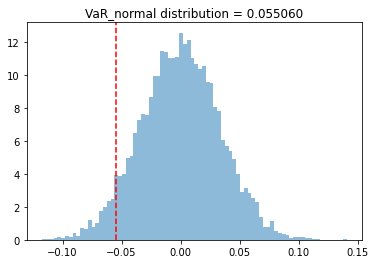

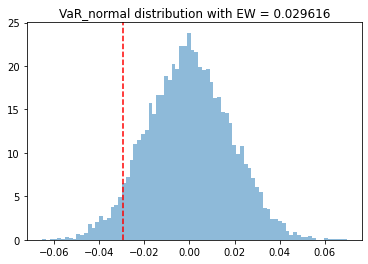

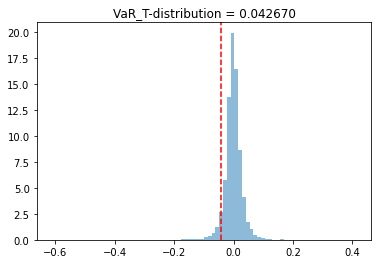

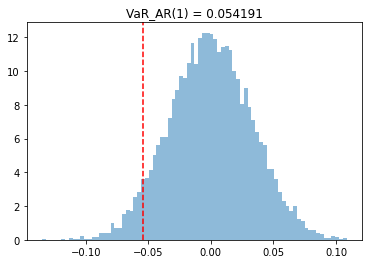

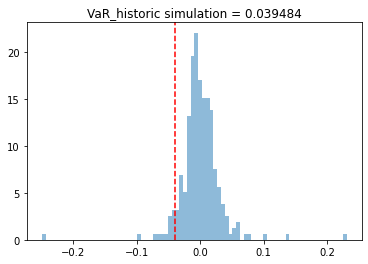

In [301]:
var_normal, returns_normal = calculate_var_normal(meta)
plot_histogram_with_var(returns_normal, var_normal, "VaR_normal distribution")

var_ew, returns_ew = calculate_var_ew_normal(meta)
plot_histogram_with_var(returns_ew, var_ew, "VaR_normal distribution with EW")

var_t, returns_t = calculate_var_t_MLE(meta)
plot_histogram_with_var(returns_t, var_t, "VaR_T-distribution")

var_ar1, returns_ar1 = calculate_var_ar1(meta)
plot_histogram_with_var(returns_ar1, var_ar1, "VaR_AR(1)")

var_hist = calculate_var(meta)
returns_hist = meta
plot_histogram_with_var(returns_hist, var_hist, "VaR_historic simulation")

# Question 3

In [383]:
portfolio = pd.read_csv("portfolio.csv")

In [384]:
portfolio.head()

,Portfolio,Stock,Holding
0,A,AAPL,158
1,A,MSFT,178
2,A,AMZN,110
3,A,NVDA,54
4,A,GOOGL,69


In [353]:
returns_discrete = pd.DataFrame()
returns_log = pd.DataFrame()
for col in prices_dropdate:
    ret_discrete = return_calculate(prices_dropdate[col])
    ret_log = return_calculate(prices_dropdate[col], method="log")
    returns_discrete[col] = ret_discrete
    returns_log[col] = ret_log

<ipython-input-353-96e08e9bf55d>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  returns_discrete[col] = ret_discrete
<ipython-input-353-96e08e9bf55d>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  returns_log[col] = ret_log


In [387]:
portfolio['Price'] = np.zeros(portfolio.shape[0])

In [388]:
# Grab the prices and present values (Holding * Price) of each stock
for i in range(len(portfolio['Stock'])):
    stock = portfolio['Stock'][i]
    price = prices_daily.iloc[-1][stock]
    portfolio['Price'][i] = price
portfolio['PV'] = portfolio['Holding']*portfolio['Price']

<ipython-input-388-35d2cd383afb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio['Price'][i] = price


In [389]:
portfolioA = portfolio[portfolio['Portfolio'] == 'A']
portfolioB = portfolio[portfolio['Portfolio'] == 'B']
portfolioC = portfolio[portfolio['Portfolio'] == 'C']

In [390]:
# calculate the weights of each stock in the portfolio in terms of the PV
ports = [portfolioA, portfolioB, portfolioC]
for port in ports:
    total = np.sum(port['PV'])
    port['Weight'] = np.zeros(port.shape[0])
    for i in port.index:
        stock = port['Stock'][i]
        weight = port['PV'][i] / total
        port['Weight'][i] = weight

/Users/fanlingrui/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
<ipython-input-390-2086b63b912b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port['Weight'][i] = weight


In [391]:
portfolioA['Price'].pct_change().dropna().iloc[0:]

1      0.813662
2     -0.592694
3      2.222584
4     -0.686974
5      0.880077
6     -0.464023
7      1.744076
8     -0.169591
9      0.692189
10    -0.772891
11     3.789803
12    -0.735296
13     0.101352
14     0.464673
15    -0.355198
16     1.653516
17     1.061260
18    -0.631242
19    -0.456121
20    -0.360476
21     0.436336
22     2.657130
23    -0.686228
24     1.926342
25    -0.683467
26    -0.645211
27    -0.069965
28     2.853463
29     0.318704
30     0.161156
31    -0.912557
32    17.190667
Name: Price, dtype: float64

In [392]:
def calculate_return(price, method = 'discrete'):
    if method == 'discrete':
        return price.pct_change()
    if method == 'log':
        return np.log(price / price.shift(1))

In [393]:
def expWeightCov(prices, portfolio, method = 'discrete'):
    price = portfolio['Price']
    returns = calculate_return(price, method = method).dropna()
    weight = expWeights(len(returns), 0.94)
    cov = expCovMat(returns, weight)
    return cov

In [395]:
port_VaRs = []
z_score = 1.645
for port in ports:
    expCov = expWeightCov(prices_dropdate, port, method='discrete')
    weights = np.array(port['Weight'])
    var = np.dot(weights.T, np.dot(expCov, weights))
    pv = np.sum(port['PV'])
    total = pv * z_score * np.sqrt(var)
    port_VaRs.append(total)

In [396]:
port_VaRs

[2008862.182001013, 512854.4959770691, 2355934.7636805954]

In [397]:
sum(port_VaRs)

4877651.4416586775

In [398]:
port_VaRs = []
for port in ports:
    price = port['Price']
    returns = calculate_return(price, method='log').dropna()
    covMat = np.cov(returns)
    weights = np.array(port['Weight'])
    var = np.dot(weights.T, np.dot(covMat, weights))
    pv = np.sum(port['PV'])
    total = pv * np.sqrt(var)
    port_VaRs.append(total)

In [402]:
port_VaRs

[290230.6066184526, 168863.01047636627, 673778.5791593153]

In [400]:
sum(port_VaRs)

1132872.1962541342